# Analysis of time measurements for a free falling object

Measurements obtained with __[phyphox](href=http://phyphox.org)__ with an Android Smartphone

Object falling from a table $L=81 cm$.<br>
Data fitted with a gaussian.<br>
$g$ obtained from $g=0.5Lt^{2}$

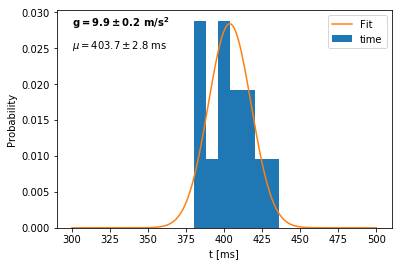

In [15]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import math

data = pd.read_csv('freefall.txt', header=None)
#data
n,bins,patches=plt.hist(data[0],bins=25,normed=True,range=(300,500),label='time')
#not possible to get the errors from norm.fit
P=ss.norm.fit(data)
rX = np.linspace(300, 500, 200)
rP = ss.norm.pdf(rX, *P)
plt.plot(rX,rP,label='Fit')
plt.xlabel('t [ms]')
plt.ylabel('Probability')
plt.legend()

g=2*0.81/(P[0]*P[0]/(1000000))
g_err=math.sqrt((2*(P[1]/math.sqrt(len(n)))/P[0])**2+(1./81.)**2)*g
          
plt.text(300, 0.028, r'g$\mathbf{=%4.1f\pm%4.1f}$ m/s$\mathbf{^2}$'%(g,g_err),fontweight='bold')
plt.text(300, 0.025, r'$\mu=%4.1f\pm%4.1f$ ms'%(P[0],P[1]/math.sqrt(len(n))))
#plt.text(300, 0.023, r'$\sigma=%4.1f\pm%4.1f$ ms'%(P[1],P[1]))

plt.show()
